# Feature Selection Techniques in Machine Learning


Feature selection is the process of isolating the most consistent, non-redundant, and relevant features to use in model construction. Reducing the size of datasets is important as the size and variety of datasets continue to grow. The main goal of **feature selection** is to improve the performance of a predictive model and reduce the *computational cost* of modeling.

The main benefits of performing feature selection in advance, rather than letting the machine learning model figure out which features are most important, include:

   1. **simpler models**: simple models are easy to explain - a model that is too complex and unexplainable is not valuable
   2. **shorter training times**: a more precise subset of features decreases the amount of time needed to train a model
   3. **variance reduction**: increase the precision of the estimates that can be obtained for a given simulation 
   4. **avoid the curse of high dimensionality**: dimensionally cursed phenomena states that, as dimensionality and the number of features increases, the volume of space increases so fast that the available data become limited. 
    

Feature selection algorithms are categorized as either supervised, which can be used for labeled data; or unsupervised, which can be used for unlabeled data. Unsupervised techniques are classified as filter methods, wrapper methods, embedded methods, or hybrid methods:
   
   - **Filter methods**: Filter methods select features based on statistics rather than feature selection cross-validation performance. A selected metric is applied to identify irrelevant attributes and perform recursive feature selection. Filter methods are either univariate, in which an ordered ranking list of features is established to inform the final selection of feature subset; or multivariate, which evaluates the relevance of the features as a whole, identifying redundant and irrelevant features.
   - **Wrapper methods**: Wrapper feature selection methods consider the selection of a set of features as a search problem, whereby their quality is assessed with the preparation, evaluation, and comparison of a combination of features to other combinations of features. This method facilitates the detection of possible interactions amongst variables. Wrapper methods focus on feature subsets that will help improve the quality of the results of the clustering algorithm used for the selection. Popular examples include *Boruta* feature selection and *Forward* feature selection
    
   - **Embedded methods**: Embedded feature selection methods integrate the feature selection machine learning algorithm as part of the learning algorithm, in which classification and feature selection are performed simultaneously. The features that will contribute the most to each iteration of the model training process are carefully extracted. Random forest feature selection, decision tree feature selection, and LASSO feature selection are common embedded methods.
    
## Why Feature Selection is Important

Feature selection is an invaluable asset for data scientists and IA engineers. Understanding how to select important features in machine learning is crucial to the efficacy of the machine learning algorithm. Irrelevant, redundant, and noisy features can pollute an algorithm, negatively impacting learning performance, accuracy, and computational cost. Feature selection is increasingly important as the size and complexity of the average dataset continues to grow exponentially.

    



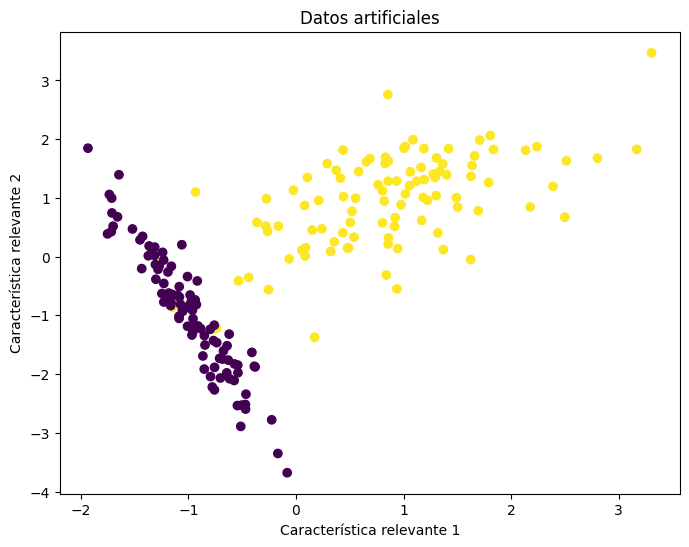

In [1]:
import numpy as np
import matplotlib.pyplot   as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Generar datos de clasificación
# 12 features, 2 relevant, 10 redundant
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, random_state=6)

# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Característica relevante 1')
plt.ylabel('Característica relevante 2')
plt.title('Datos artificiales')
plt.show()

add 10 non-relevant features and apply ``MinMaxScaler``

In [2]:
X_non_useful = np.random.randn(X.shape[0],5)
X = np.hstack(([X,X_non_useful+5,X_non_useful+X_non_useful*3+5]))

X = scaler.fit_transform(X)
X.shape

(200, 12)



## Filter methods

Filter methods pick up the intrinsic properties of the features measured via univariate statistics instead of cross-validation performance. These methods are faster and less computationally expensive than wrapper methods. When dealing with high-dimensional data, it is computationally cheaper to use filter methods.

1. Information Gain

Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.


<BarContainer object of 12 artists>

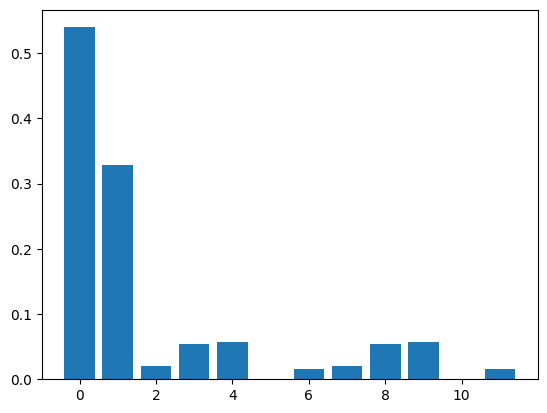

In [3]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
importances = mutual_info_classif(X,y)

plt.bar(np.arange(12),importances)

2.Chi-square Test

The Chi-Square test is commonly used for feature selection in classification problems. It measures the dependency between features and the target variable. Higher values of the Chi-Square statistic indicate a stronger relationship between a feature and the target.



       Feature  Chi2 Score
0    Feature_1   17.577322
1    Feature_2    6.943204
7    Feature_8    0.097661
2    Feature_3    0.097661
11  Feature_12    0.082227
6    Feature_7    0.082227
4    Feature_5    0.035603
9   Feature_10    0.035603
3    Feature_4    0.011720
8    Feature_9    0.011720
5    Feature_6    0.001537
10  Feature_11    0.001537


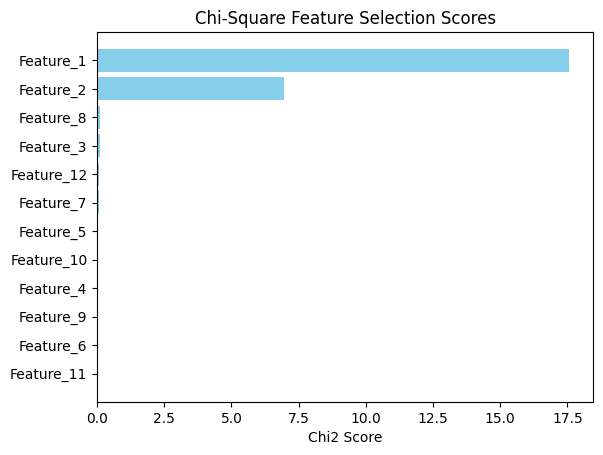

Selected Features: ['Feature_1' 'Feature_2']


In [4]:
from sklearn.feature_selection import SelectKBest, chi2

# Create a DataFrame for better visualization
columns = [f'Feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['Target'] = y

# 2. Apply Chi-Square feature selection
# Using SelectKBest with chi2 to select the best 4 features
chi2_selector = SelectKBest(chi2, k=4)
X_kbest = chi2_selector.fit_transform(X, y)

# 3. Displaying the scores for each feature
chi2_scores = pd.DataFrame({'Feature': columns, 'Chi2 Score': chi2_selector.scores_}).sort_values(by='Chi2 Score', ascending=False)
print(chi2_scores)

# 4. Plotting the scores
plt.barh(chi2_scores['Feature'], chi2_scores['Chi2 Score'], color='skyblue')
plt.xlabel('Chi2 Score')
plt.title('Chi-Square Feature Selection Scores')
plt.gca().invert_yaxis()
plt.show()

# 5. Identifying the two relevant features
selected_features = chi2_scores.head(2)['Feature'].values
print(f"Selected Features: {selected_features}")


3. Fisher’s Score

Fisher score is one of the most widely used supervised feature selection methods. The algorithm which we will use returns the ranks of the variables based on the fisher’s score in descending order. We can then select the variables as per the case.

In [ ]:
!pip install skfeature-chappers

<BarContainer object of 12 artists>

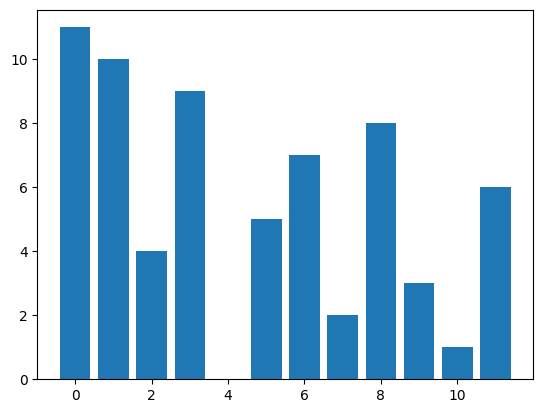

In [5]:
from skfeature.function.similarity_based import fisher_score

importances = fisher_score.fisher_score(X,y)
plt.bar(np.arange(12),importances)

4. Correlation Coefficient

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only really needs one of them, as the second one does not add additional information. We will use the Pearson Correlation here.

```
conda install seaborn
```

<Axes: >

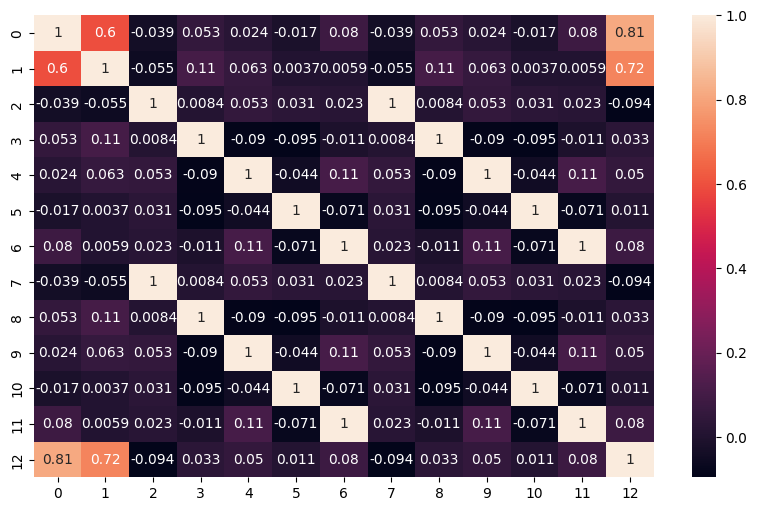

In [6]:
import seaborn as sns
y2 =  np.array([y]).T
X_new_class = np.append(X,y2,axis=1)

cor_mat = np.corrcoef(X_new_class,rowvar=False)

plt.figure(figsize=(10,6))
sns.heatmap(cor_mat, annot=True)

## B. Wrapper Methods:

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.

1. Forward Feature Selection

This is an iterative method wherein we start with the best performing variable against the target. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.


Selected Features: ['Feature_1', 'Feature_2']


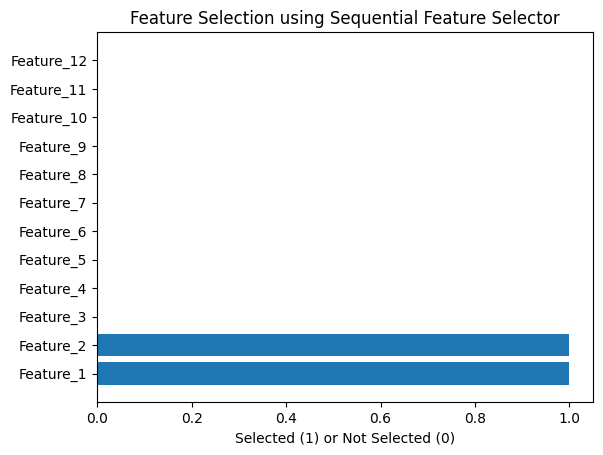

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# 3. Apply Sequential Feature Selector (SFS)
# We'll use forward selection: start with no features and add one by one
sfs = SequentialFeatureSelector(logreg, n_features_to_select=2, direction='forward')
sfs.fit(X_train, y_train)

# 4. Get the selected features
selected_features = sfs.get_support(indices=True)
selected_feature_names = [columns[i] for i in selected_features]
print(f"Selected Features: {selected_feature_names}")

# 5. Visualize the selected features in comparison to all features
all_features = np.arange(X.shape[1])
plt.barh([f'Feature_{i+1}' for i in all_features], sfs.get_support())
plt.xlabel('Selected (1) or Not Selected (0)')
plt.title('Feature Selection using Sequential Feature Selector')
plt.show()


2. Recursive Feature Elimination

‘Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute.

Then, the least important features are pruned from the current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.’

       Feature  Ranking
0    Feature_1        1
1    Feature_2        1
2    Feature_3        1
7    Feature_8        1
11  Feature_12        2
5    Feature_6        3
4    Feature_5        4
6    Feature_7        5
10  Feature_11        6
9   Feature_10        7
3    Feature_4        8
8    Feature_9        9


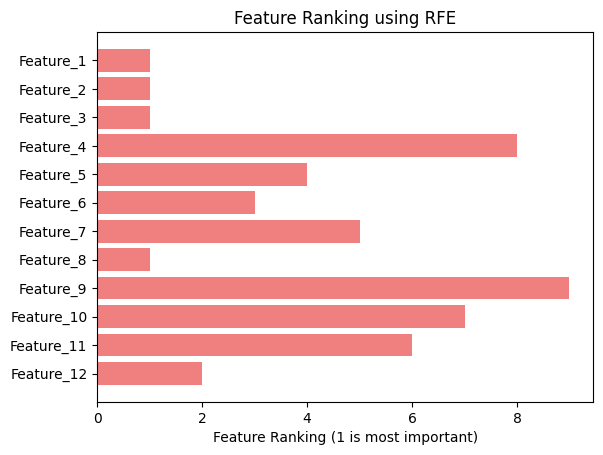

Selected Features: ['Feature_1' 'Feature_2' 'Feature_3' 'Feature_8']


In [9]:
from sklearn.feature_selection import RFE

# 1. Create a logistic regression model
logreg = LogisticRegression(max_iter=1000)

# 2. Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=logreg, n_features_to_select=4)
rfe.fit(X, y)

# 3. Get the selected features and ranking of all features
ranking = rfe.ranking_  # Ranks all features
selected_features = rfe.support_  # True for selected features

# Display feature rankings
feature_ranking = pd.DataFrame({'Feature': [f'Feature_{i+1}' for i in range(X.shape[1])],
                                'Ranking': ranking})
print(feature_ranking.sort_values(by='Ranking'))

# 4. Visualize the feature rankings
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'], color='lightcoral')
plt.xlabel('Feature Ranking (1 is most important)')
plt.title('Feature Ranking using RFE')
plt.gca().invert_yaxis()  # Invert the axis for better readability
plt.show()

# 5. Identifying the top 2 selected features
selected_feature_names = feature_ranking[feature_ranking['Ranking'] == 1]['Feature'].values
print(f"Selected Features: {selected_feature_names}")


## Embedded Methods:

These methods encompass the benefits of both the wrapper and filter methods, by including interactions of features but also maintaining reasonable computational cost. Embedded methods are iterative in the sense that takes care of each iteration of the model training process and carefully extracts those features which contribute the most to the training for a particular iteration.


1. LASSO Regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e. to avoid over-fitting. In linear model regularization, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularization, Lasso or L1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

       Feature  Coefficient
0    Feature_1    13.741773
1    Feature_2     7.080531
2    Feature_3     0.000000
3    Feature_4     0.000000
4    Feature_5     0.000000
5    Feature_6     0.000000
6    Feature_7     0.000000
7    Feature_8     0.000000
8    Feature_9     0.000000
9   Feature_10     0.000000
10  Feature_11     0.000000
11  Feature_12     0.000000


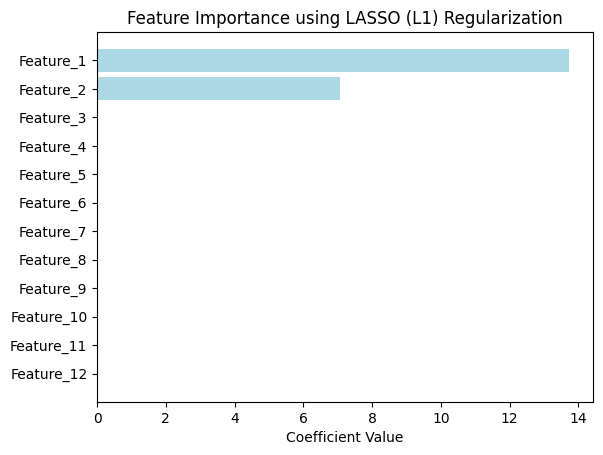

Selected Features: ['Feature_1', 'Feature_2']


In [10]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 1. Standardize the dataset (important for regularization techniques)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X_scaled = X #this was already scaled using MinMax

# 2. Apply LASSO (L1) regularization using Logistic Regression
# Logistic Regression with L1 regularization (penalty='l1') and solver='saga' for L1 support
lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
lasso.fit(X_scaled, y)

# 3. Get the coefficients (weights) of the features
lasso_coefficients = lasso.coef_[0]  # LASSO coefficients for the features

# 4. Identify the relevant features (those with non-zero coefficients)
selected_features = np.where(lasso_coefficients != 0)[0]
selected_feature_names = [f'Feature_{i+1}' for i in selected_features]

# Create a DataFrame for better visualization of the coefficients
coeff_df = pd.DataFrame({'Feature': [f'Feature_{i+1}' for i in range(X.shape[1])],
                         'Coefficient': lasso_coefficients})
print(coeff_df)

# 5. Plot the coefficients to visualize the importance of each feature
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance using LASSO (L1) Regularization')
plt.gca().invert_yaxis()  # Invert the axis for better readability
plt.show()

# 6. Print the selected features
print(f"Selected Features: {selected_feature_names}")


Same approach but using ``SlectFromModel``

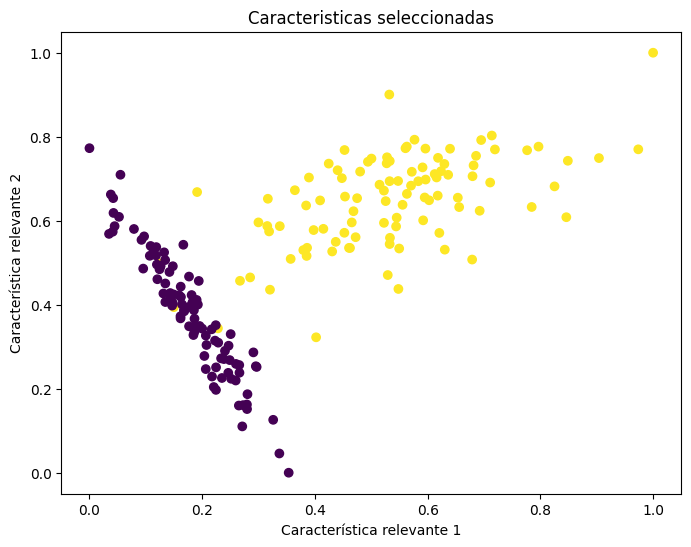

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

clf = LogisticRegression(C=1, penalty='l1',solver='liblinear')
clf.fit(X,y)

model = SelectFromModel(estimator=clf,prefit=True)

X_new_fs = model.transform(X)


# Visualizar los datos
plt.figure(figsize=(8, 6))
plt.scatter(X_new_fs[:, 0], X_new_fs[:, 1], c=y, cmap='viridis')
plt.xlabel('Característica relevante 1')
plt.ylabel('Característica relevante 2')
plt.title('Caracteristicas seleccionadas')
plt.show()

2. Random Forest Importance

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

<BarContainer object of 12 artists>

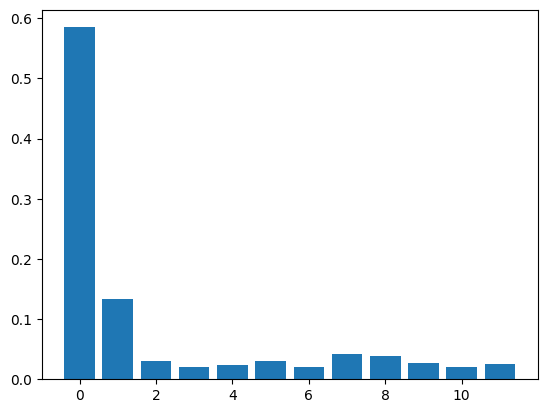

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X,y)

importances = clf.feature_importances_
plt.bar(np.arange(12),importances)

In [119]:
importances 

array([0.4948356 , 0.44904426, 0.00258598, 0.00643156, 0.00912906,
       0.00608225, 0.00537505, 0.00345945, 0.00717474, 0.00634388,
       0.00324954, 0.00628863])

# A Case study in Python
The dataset corresponds to classification tasks on which you need to predict if a person has diabetes based on 8 features.

There are a total of 768 observations in the dataset. Your first task is to load the dataset so that you can proceed. But before that let's import the necessary dependencies, you are going to need. You can import the other ones as you go along.

In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPresure,SkinThickness,insulin,BMI,DiabetesPedFunc,age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


So you can see 8 different features labeled into the outcomes of 1 and 0 where 1 stands for the observation has diabetes, and 0 denotes the observation does not have diabetes. The dataset is known to have missing values. Specifically, there are missing observations for some columns that are marked as a zero value

In [37]:
names = data.columns[:8]
#array = dataframe.values
array = data.values
X = array[:,0:8]
Y = array[:,8]


In [16]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


Interpretation:

You can see the scores for each attribute and the 4 attributes chosen (those with the highest scores): plas, test, mass, and age. This scores will help you further in determining the best features for training your model.

P.S.: The first row denotes the names of the features. For preprocessing of the dataset, the names have been numerically encoded.

Next, you will implement Recursive Feature Elimination which is a type of wrapper feature selection method.

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [40]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Feature extraction
model = LogisticRegression(max_iter=1000)

# 2. Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=model, n_features_to_select=4)
fit= rfe.fit(X, Y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 4
Selected Features: [ True  True False False False  True  True False]
Feature Ranking: [1 1 3 5 4 1 1 2]


In [41]:
names[fit.support_]

Index(['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedFunc'], dtype='object')

You can see that RFE chose the top 3 features as preg, mass, and pedi.

These are marked True in the support array and marked with a choice “1” in the ranking array. This, in turn, indicates the strength of these features.

Next up you will use Ridge regression which is basically a regularization technique and an embedded feature selection techniques as well.

           Feature  Coefficient
0      Pregnancies     0.408804
1          Glucose     1.107349
2     BloodPresure    -0.250794
3    SkinThickness     0.009010
4          insulin    -0.130753
5              BMI     0.696354
6  DiabetesPedFunc     0.308889
7              age     0.176551


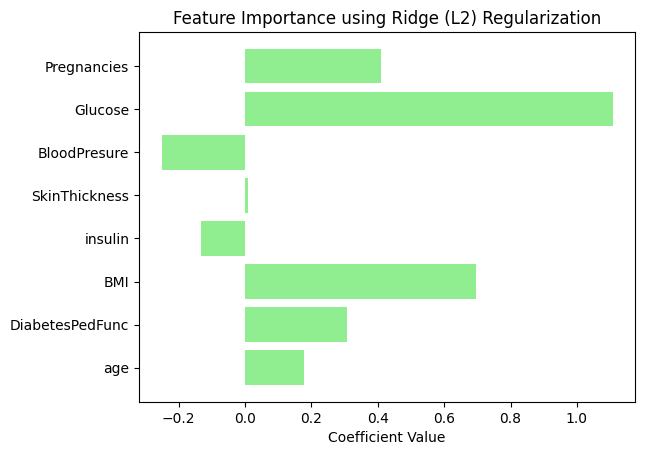

Top 2 Features: ['Glucose' 'BMI']


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# 1. Standardize the dataset (important for regularization techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply Ridge (L2) regularization using Logistic Regression
# Logistic Regression with L2 regularization (default) and solver='lbfgs'
ridge = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
ridge.fit(X_scaled, Y)


# 3. Get the coefficients (weights) of the features
ridge_coefficients = ridge.coef_[0]  # Ridge coefficients for the features

# Create a DataFrame for better visualization of the coefficients
coeff_df = pd.DataFrame({'Feature': [f'{feat}' for feat in names],
                         'Coefficient': ridge_coefficients})
print(coeff_df)

# 4. Plot the coefficients to visualize the importance of each feature
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='lightgreen')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance using Ridge (L2) Regularization')
plt.gca().invert_yaxis()  # Invert the axis for better readability
plt.show()

# 5. Identifying the top features with largest coefficients
# This does not mean the coefficients will be exactly zero, but larger coefficients indicate more relevant features.
important_features = coeff_df.sort_values(by='Coefficient', ascending=False)
print(f"Top 2 Features: {important_features.head(2)['Feature'].values}")


# **Why do these traditional feature selection methods still hold?**

Yes, this question is obvious. Because there are neural net architectures (for example CNNs) which are quite capable of extracting the most significant features from data but that too has a limitation. Using a CNN for a regular tabular dataset which does not have specific properties (the properties that a typical image holds like transitional properties, edges, positional properties, contours etc.) is not the wisest decision to make. Moreover, when you have limited data and limited resources, training a CNN on regular tabular datasets might turn into a complete waste. So, in situations like that, the methods that you studied will definitely come handy

## Exercise

**Context**

Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [12]:
import pandas as pd
import numpy as np

mobile_data = pd.read_csv("train.csv")

X = mobile_data.iloc[:,0:20]  #independent variables
y = mobile_data.iloc[:,-1]    #target variable i.e price range
names = mobile_data.columns[:-1]


Using different feature selection methods, identify the most relevant features in this dataset. After performing these experiments, interpret the results. Does it make any sense?

In [13]:
names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')